In [0]:
from keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
train_gen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generator = train_gen.flow_from_directory('../data/101_ObjectCategories/', 
                                                target_size=img_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='training',
                                               )
valid_generator = train_gen.flow_from_directory('../data/101_ObjectCategories/', 
                                                target_size=img_size,
                                                batch_size=32,
                                                class_mode="categorical",
                                                subset='validation',
                                               )

Found 6982 images belonging to 101 classes.
Found 1695 images belonging to 101 classes.


In [0]:
from model import ResNet34, ResNet50
resnet34, resnet50 = ResNet34(n_classes=101), ResNet50(n_classes=101)
resnet34.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
resnet50.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history_34 = resnet34.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n//train_generator.batch_size, 
                              validation_data=valid_generator, 
                              validation_steps=valid_generator.n//valid_generator.batch_size, 
                              epochs=50, 
                             )


Epoch 1/50
218/218 [==============================] - 67s 307ms/step - loss: 4.2034 - acc: 0.2368 - val_loss: 6.0986 - val_acc: 0.0547
Epoch 2/50
218/218 [==============================] - 55s 254ms/step - loss: 2.8842 - acc: 0.3827 - val_loss: 6.2342 - val_acc: 0.0704
Epoch 3/50
218/218 [==============================] - 56s 255ms/step - loss: 2.2521 - acc: 0.4825 - val_loss: 4.2024 - val_acc: 0.2219
Epoch 4/50
218/218 [==============================] - 56s 257ms/step - loss: 1.8512 - acc: 0.5539 - val_loss: 2.2960 - val_acc: 0.4949
Epoch 5/50
218/218 [==============================] - 56s 259ms/step - loss: 1.5148 - acc: 0.6219 - val_loss: 1.9695 - val_acc: 0.5430
Epoch 6/50
218/218 [==============================] - 57s 259ms/step - loss: 1.2445 - acc: 0.6896 - val_loss: 1.9312 - val_acc: 0.5472
Epoch 7/50
218/218 [==============================] - 56s 259ms/step - loss: 0.9569 - acc: 0.7458 - val_loss: 1.9416 - val_acc: 0.5508
Epoch 8/50
218/218 [==============================] - 5

In [26]:
history_50 = resnet50.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n//train_generator.batch_size, 
                              validation_data=valid_generator, 
                              validation_steps=valid_generator.n//valid_generator.batch_size, 
                              epochs=50, 
                             )

Epoch 1/50
218/218 [==============================] - 112s 512ms/step - loss: 3.4545 - acc: 0.3183 - val_loss: 3.8816 - val_acc: 0.2502
Epoch 2/50
218/218 [==============================] - 95s 436ms/step - loss: 2.3021 - acc: 0.4737 - val_loss: 3.7274 - val_acc: 0.3151
Epoch 3/50
218/218 [==============================] - 95s 437ms/step - loss: 1.7486 - acc: 0.5730 - val_loss: 2.7213 - val_acc: 0.4161
Epoch 4/50
218/218 [==============================] - 96s 441ms/step - loss: 1.3793 - acc: 0.6509 - val_loss: 4.7356 - val_acc: 0.1792
Epoch 5/50
218/218 [==============================] - 96s 440ms/step - loss: 1.0962 - acc: 0.7137 - val_loss: 3.2417 - val_acc: 0.4221
Epoch 6/50
218/218 [==============================] - 96s 441ms/step - loss: 0.7766 - acc: 0.7888 - val_loss: 1.8851 - val_acc: 0.5719
Epoch 7/50
218/218 [==============================] - 96s 439ms/step - loss: 0.6045 - acc: 0.8383 - val_loss: 2.0470 - val_acc: 0.5586
Epoch 8/50
218/218 [==============================] - 

In [0]:
history34 = history_34
history50 = history_50

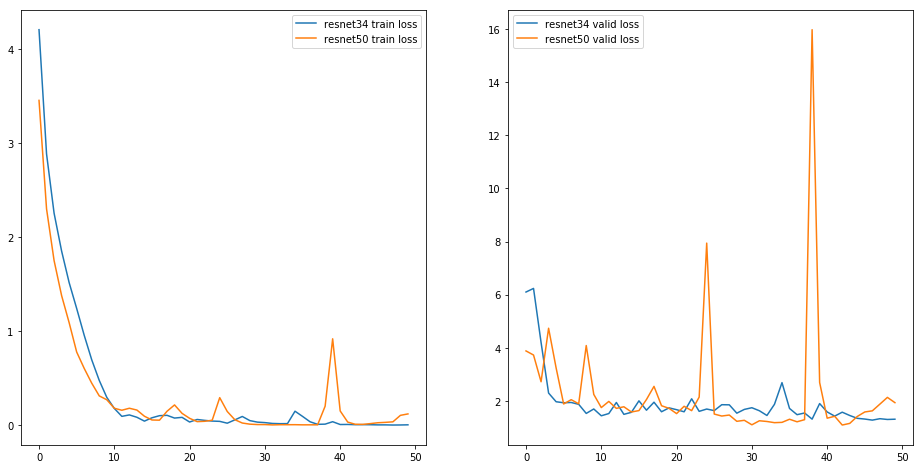

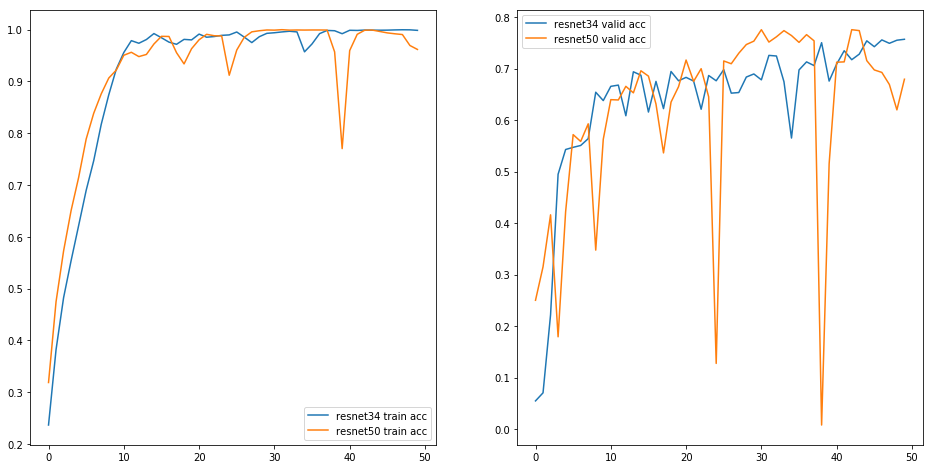

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(history34.history['loss'])), history34.history['loss'], label='resnet34 train loss')
plt.plot(np.arange(len(history50.history['loss'])), history50.history['loss'], label='resnet50 train loss')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(history34.history['val_loss'])), history34.history['val_loss'], label='resnet34 valid loss')
plt.plot(np.arange(len(history50.history['val_loss'])), history50.history['val_loss'], label='resnet50 valid loss')
plt.legend(loc=0)
plt.savefig('loss.png')

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(history34.history['acc'])), history34.history['acc'], label='resnblob:https://colab.research.google.com/81d32f0f-143c-4257-ab89-ca78610741d7et34 train acc')
plt.plot(np.arange(len(history50.history['acc'])), history50.history['acc'], label='resnet50 train acc')
plt.legend(loc=0)

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(history34.history['val_acc'])), history34.history['val_acc'], label='resnet34 valid acc')
plt.plot(np.arange(len(history50.history['val_acc'])), history50.history['val_acc'], label='resnet50 valid acc')
plt.legend(loc=0)

plt.savefig('accuracy.png')